In [4]:
import pandas as pd
from scipy.stats import boxcox
import matplotlib.pyplot as plt
from scipy.stats import shapiro

df = pd.read_csv('./data/data.csv', sep='|', header=None)
# show all columns
pd.set_option('display.max_columns', None)

#### Rename columns

In [5]:
'''rename columns with the following: query_id, veh_id, query_date, car_feature_1, car_feature_2, price, car_feature_3, car_feature_4, car_feature_5, cont_car_feature_1,
    cont_car_feature_2, cont_car_feature_3, car_feature_6, car_feature_7, car_feature_8, cont_car_feature_3,car_feature_9, car_feature_10,car_feature_11, query_feature_1,
     query_feature_2, duration, pickup_date,  query_feature_3, target
'''
df.columns = ['query_id', 'veh_id', 'query_date', 'car_feature_1', 'car_feature_2', 'price', 'car_feature_3', 'car_feature_4', 'car_feature_5', 'cont_car_feature_1', 'cont_car_feature_2', 'cont_car_feature_3', 'car_feature_6', 'car_feature_7', 'car_feature_8', 'cont_car_feature_4', 'car_feature_9', 'car_feature_10', 'car_feature_11', 'query_feature_1', 'query_feature_2', 'duration', 'pickup_date', 'query_feature_3', 'target']


In [6]:
df.head(2)

,query_id,veh_id,query_date,car_feature_1,car_feature_2,price,car_feature_3,car_feature_4,car_feature_5,cont_car_feature_1,cont_car_feature_2,cont_car_feature_3,car_feature_6,car_feature_7,car_feature_8,cont_car_feature_4,car_feature_9,car_feature_10,car_feature_11,query_feature_1,query_feature_2,duration,pickup_date,query_feature_3,target
0,102120401529162609,1001396153,2017-01-02 12:04:01,2,1,750.26,2,1,1,5,1,7,1,0,8,8.0,385,3,1,1,2,14.0,2017-02-04 00:00:00,71,0
1,102120401529162609,401793302,2017-01-02 12:04:01,2,1,322.12,4,1,1,5,5,5,0,0,4,6.0,1368,3,0,1,2,14.0,2017-02-04 00:00:00,71,0


In [7]:
# find unique values in cat features

df['duration'] = df['duration'].astype('int64')
for col in df[['car_feature_1','car_feature_2','car_feature_3','car_feature_4','car_feature_5','car_feature_6','car_feature_7','car_feature_8','car_feature_9','car_feature_10','car_feature_11','query_feature_1','query_feature_2','query_feature_3','duration']]:
    print(col, df[col].unique())



car_feature_1 [2 1 3]
car_feature_2 [1 0]
car_feature_3 [ 2  4  1 11  5  0]
car_feature_4 [1 9 7 8]
car_feature_5 [1 2 5 3 4]
car_feature_6 [1 0]
car_feature_7 [0 1]
car_feature_8 [ 8  4  2  1  7  3  9 11 10  6  5 15 13 14 12 16]
car_feature_9 [ 385 1368 1741 1912 1960 2336   47 3059  479  298 1136   84  505 2343
 2645  139 1715 2121 2652 3008 1689 2375 2789 2935 1613 2469 1246 3138
  420 2354  306 2837  321 2707 2913 1959 2087 2365 2300 2927 3167  222
 1952  299 2294 3066 6021 2168  968 3083 2798 3140 1962 2535 2574 1075
 1660 2184]
car_feature_10 [ 3  2 13 15 17 12]
car_feature_11 [1 0]
query_feature_1 [ 1  7  3 15  2 19  6 16 13  5 12 10  4 18  8 35 11 17 24  9 45 25 14 23
 27 22 38 32 31 37 20 40 42 29 30 26 21 44 34 46 39 41 36 33]
query_feature_2 [2 1]
query_feature_3 [  71 2492]
duration [14  7 21  8  3 10  4  9 12 15 19 11  5  6  1 17 28 25 16 18 22 20 13 32
 23  2 57 56 49 30 29 27 42 24 46 36 31 41 63 43 62 33 70 35 38 40 26 60
 34 37 52 51 58 39 55]


### Check for missing values


<AxesSubplot:>

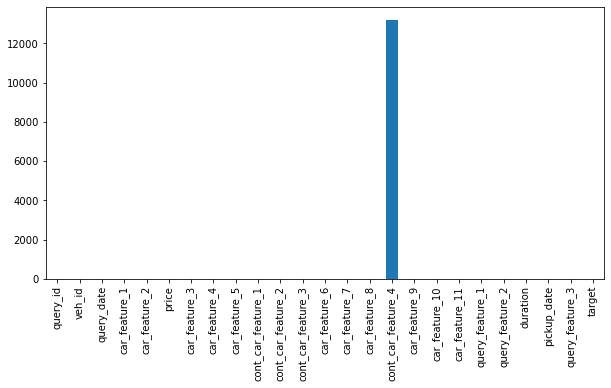

In [8]:
# Plot missing values in each column
df.isnull().sum().plot(kind='bar', figsize=(10, 5))

#### Fill na with mean value

In [9]:
print('column name cont_car_feature_4 has {} missing values'.format(df['cont_car_feature_4'].isnull().sum()))

column name cont_car_feature_4 has 13197 missing values


In [10]:

df['cont_car_feature_4'].fillna(df['cont_car_feature_4'].mean(), inplace=True)
print('column name cont_car_feature_4 has {} missing values after filling missing values with the mean'.format(df['cont_car_feature_4'].isnull().sum()))

column name cont_car_feature_4 has 0 missing values after filling missing values with the mean


### Check Pearson correlation amongst continuous variables

From the heatmap we can see that there is no strong correlation amongst the continuous features


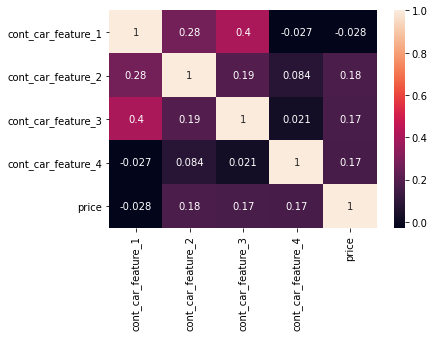

In [11]:
# Plot correlation matrix
import seaborn as sns
corr = df[['cont_car_feature_1', 'cont_car_feature_2', 'cont_car_feature_3', 'cont_car_feature_4','price']].corr()
sns.heatmap(corr, annot=True)
print("From the heatmap we can see that there is no strong correlation amongst the continuous features")


### Descriptive statistics of continuous variables. The cell below shows the point estimates of continous variables.

In [12]:
# Median
df.groupby('target')['cont_car_feature_1', 'cont_car_feature_2', 'cont_car_feature_3', 'cont_car_feature_4','price'].median()

<ipython-input-12-1734c3a2234c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('target')['cont_car_feature_1', 'cont_car_feature_2', 'cont_car_feature_3', 'cont_car_feature_4','price'].median()


,cont_car_feature_1,cont_car_feature_2,cont_car_feature_3,cont_car_feature_4,price
target,,,,,
0,5,3,5,7.0,437.39
1,5,2,5,6.0,280.38


In [13]:
# Mean
df.groupby('target')['cont_car_feature_1', 'cont_car_feature_2', 'cont_car_feature_3', 'cont_car_feature_4','price'].mean()

<ipython-input-13-5c7482d6daa3>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('target')['cont_car_feature_1', 'cont_car_feature_2', 'cont_car_feature_3', 'cont_car_feature_4','price'].mean()


,cont_car_feature_1,cont_car_feature_2,cont_car_feature_3,cont_car_feature_4,price
target,,,,,
0,4.531307,2.841947,5.216280,6.828082,628.979331
1,4.716609,2.653277,5.084032,6.731675,333.881730


### Label encoding for car_feature_9 and query_feature_3

In [14]:
## Label encoding for car_feature_9 and query_feature_3
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['car_feature_9'] = le.fit_transform(df['car_feature_9'])
df['query_feature_3'] = le.fit_transform(df['query_feature_3'])

## Distribution of categorical variables booked and not booked vehicles population.




In [15]:
cat_features = df[['car_feature_1','car_feature_2','car_feature_3','car_feature_4','car_feature_5','car_feature_6','car_feature_7','car_feature_8',
        'car_feature_9','car_feature_10','car_feature_11','query_feature_1','query_feature_2','query_feature_3','duration','target']]
def plot_ratios(df:pd.DataFrame)-> pd.DataFrame:
    """
    __summary__: This function returns the ratio of each category in a categorical feature for their respective target values
    parameter:
        df {pd.DataFrame} : The dataframe containing the categorical feature and the target
    return:
        pd.DataFrame : The dataframe containing the ratio of each category in a categorical feature for their respective target values

    """
    ratio_ = pd.DataFrame()
    for i in df.target.unique():
        target_df = df[df['target'] == i]
        for col in target_df.columns.unique():
            col_df = target_df[col].value_counts()/target_df.shape[0]
            col_df = col_df.reset_index()
            col_df.columns = [col, 'ratio']
            col_df['target'] = i
            ratio_ = pd.concat([ratio_, col_df], axis=0)
    return ratio_
data_ratio = plot_ratios(cat_features)  

data_ratio = data_ratio.reset_index()
data_ratio = data_ratio.drop('index', axis=1)


<AxesSubplot:xlabel='car_feature_7', ylabel='ratio'>

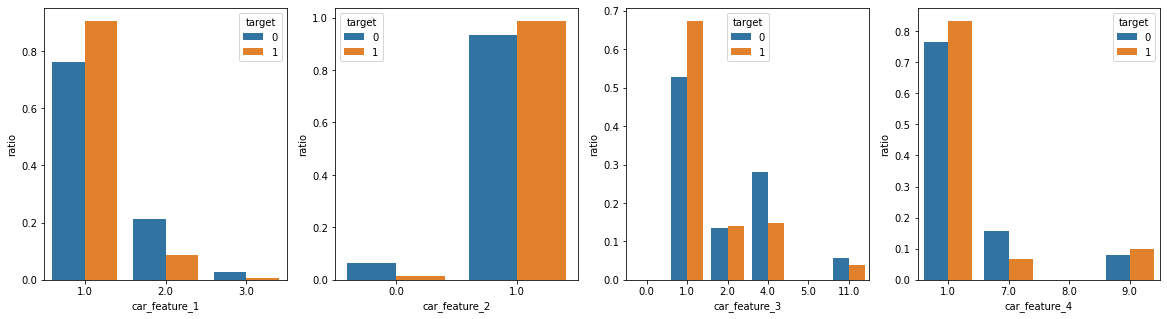

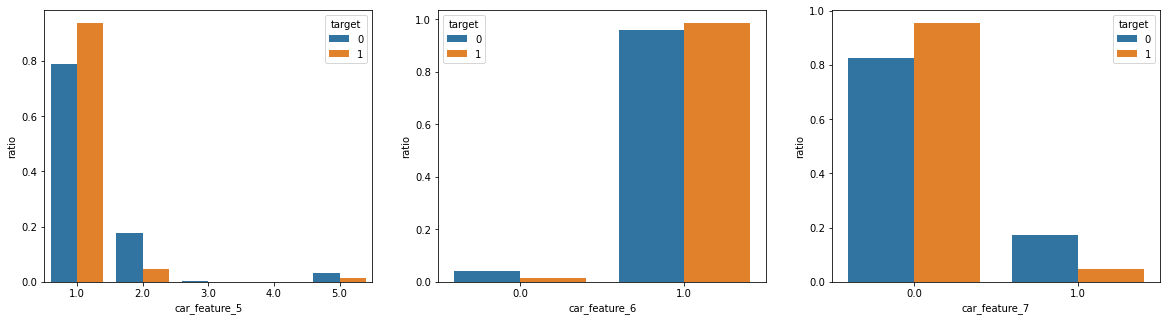

In [16]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
sns.barplot(x='car_feature_1', y='ratio', hue='target', data=data_ratio, ax=ax[0])
sns.barplot(x='car_feature_2', y='ratio', hue='target', data=data_ratio, ax=ax[1])
sns.barplot(x='car_feature_3', y='ratio', hue='target', data=data_ratio, ax=ax[2])
sns.barplot(x='car_feature_4', y='ratio', hue='target', data=data_ratio, ax=ax[3])



fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.barplot(x='car_feature_5', y='ratio', hue='target', data=data_ratio, ax=ax[0])
sns.barplot(x='car_feature_6', y='ratio', hue='target', data=data_ratio, ax=ax[1])
sns.barplot(x='car_feature_7', y='ratio', hue='target', data=data_ratio, ax=ax[2])

### From above ratio plots we can see that category 1 from car_feature_1, car_feature_2, car_feature_3, car_feature_4, car_feature_5, car_feature_7 have been used more when it comes to booking a vehicle.

<AxesSubplot:xlabel='car_feature_8', ylabel='ratio'>

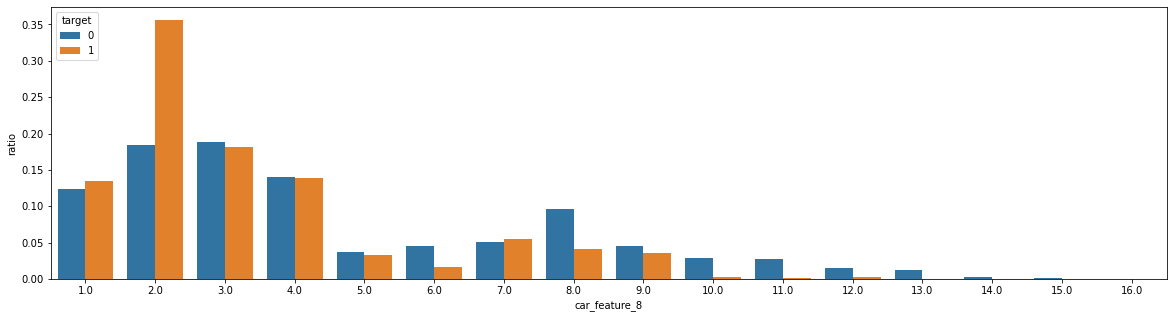

In [17]:
fig, ax = plt.subplots(1, figsize=(20, 5))
sns.barplot(x='car_feature_8', y='ratio', hue='target', data=data_ratio)

### From above ratio plot we can see that category 2 from car_feature_8 have been used significantly more compared to non booked vehicle when it comes to booking a vehicle.

<AxesSubplot:xlabel='car_feature_9', ylabel='ratio'>

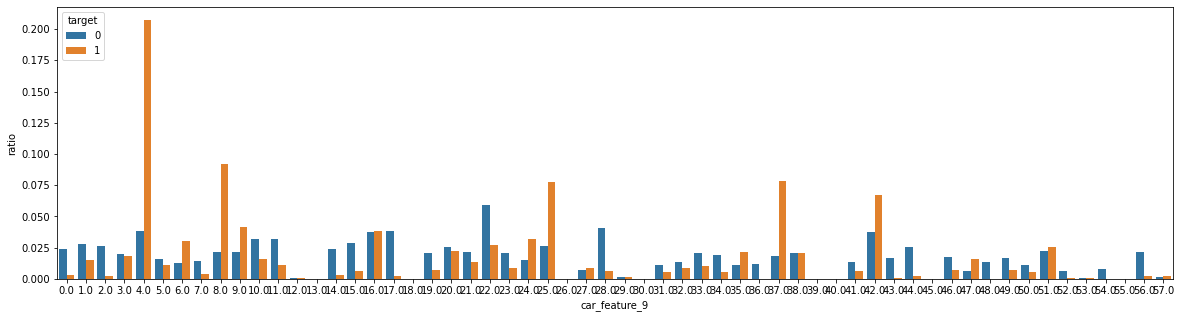

In [18]:
fig, ax = plt.subplots(1, figsize=(20, 5))
sns.barplot(x='car_feature_9', y='ratio', hue='target', data=data_ratio)

### From above ratio plot we can see that category 4 from car_feature_9 have been used significantly more when it comes to booking a vehicle.

<AxesSubplot:xlabel='car_feature_11', ylabel='ratio'>

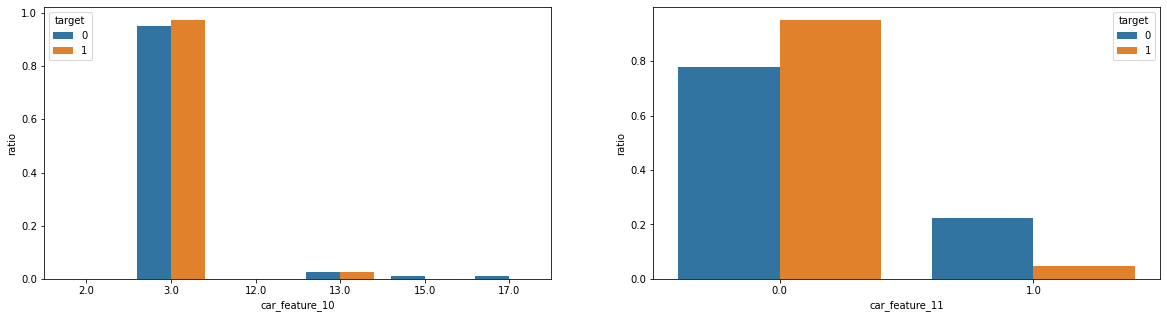

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.barplot(x='car_feature_10', y='ratio', hue='target', data=data_ratio, ax=ax[0])
sns.barplot(x='car_feature_11', y='ratio', hue='target', data=data_ratio, ax=ax[1])


## Catergory 0 from car_feature_11 have been used more when it comes to booking a vehicle. Category 3 from car_feature_10 have been used significantly more than other categories when it comes to booking a vehicle.

<AxesSubplot:xlabel='query_feature_1', ylabel='ratio'>

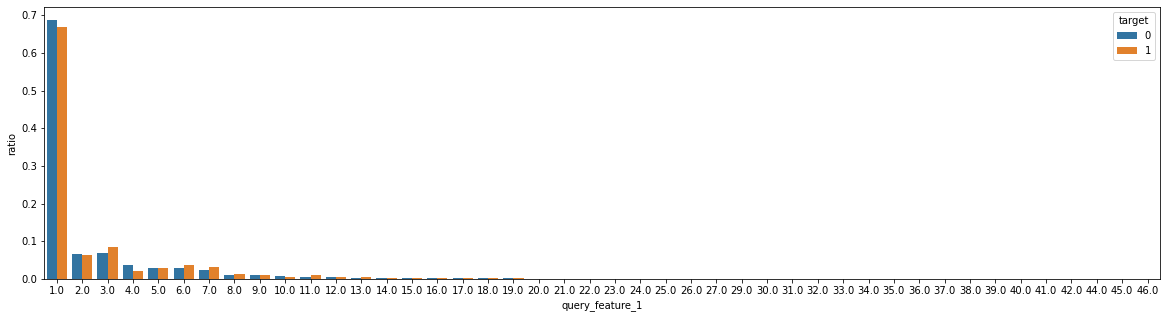

In [20]:
fig, ax = plt.subplots(1, figsize=(20, 5))
sns.barplot(x='query_feature_1', y='ratio', hue='target', data=data_ratio)

## Catergory 1 from query_feature_1 have been used more compared to other categories when it comes to booking a vehicle.

<AxesSubplot:xlabel='duration', ylabel='ratio'>

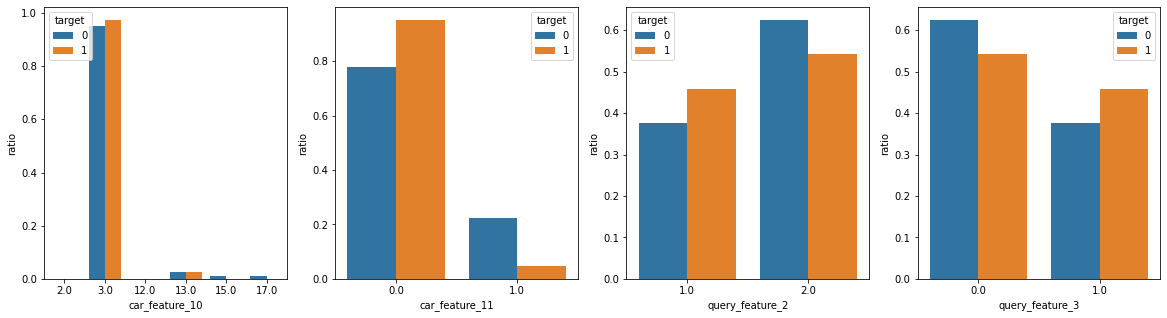

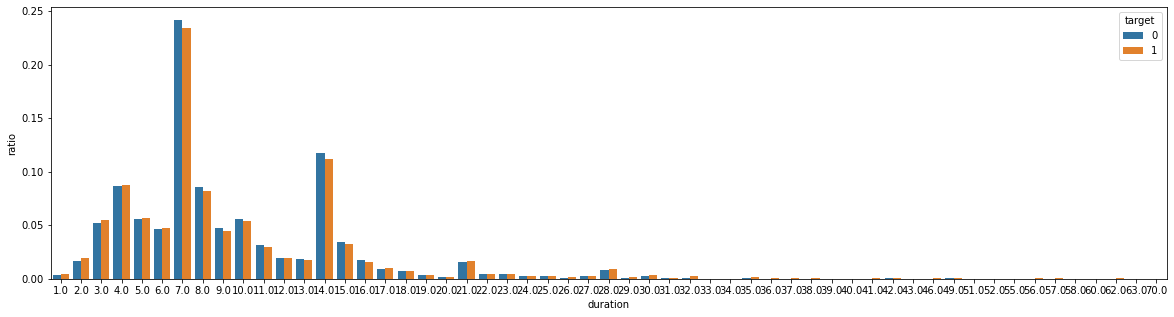

In [21]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
sns.barplot(x='car_feature_10', y='ratio', hue='target', data=data_ratio, ax=ax[0])
sns.barplot(x='car_feature_11', y='ratio', hue='target', data=data_ratio, ax=ax[1])
sns.barplot(x='query_feature_2', y='ratio', hue='target', data=data_ratio, ax=ax[2])
sns.barplot(x='query_feature_3', y='ratio', hue='target', data=data_ratio, ax=ax[3])


fig, ax = plt.subplots(1 ,figsize=(20, 5))
sns.barplot(x='duration', y='ratio', hue='target', data=data_ratio)


### Category 3 from car_feature_10 have been used significantly more than other categories when it comes to booking a vehicle. Vehicles are generally booked for 7 days and 14 days.

In [22]:
df.duration.value_counts()

7     268184
14    130225
4      95697
8      95034
10     62035
5      61655
3      58083
9      53095
6      52058
15     37734
11     35161
12     21747
13     20048
16     19004
2      18478
21     16934
17     10089
28      8904
18      7749
22      4914
23      4819
19      4129
1       3654
27      2732
25      2718
30      2687
24      2648
20      1780
29      1289
26      1137
32       760
35       363
42       354
31       334
49       317
38       276
36       251
37       215
57       165
62       162
56       144
33       115
39       107
41       106
43       103
46        92
52        90
51        85
58        64
55        63
40        40
63        39
70        36
34        32
60        31
Name: duration, dtype: int64

### Mutual information between categorical variables and target variable. It is used to see the dependency between categorical variables on target variable.

In [23]:
from sklearn.feature_selection import mutual_info_classif as MIC
X = df[['car_feature_1', 'car_feature_2', 'car_feature_3', 'car_feature_4', 'car_feature_5', 'car_feature_6', 'car_feature_7', 'car_feature_8', 'car_feature_9', 'car_feature_10', 'car_feature_11', 'query_feature_1', 'query_feature_2', 'query_feature_3','duration']]
y =  df['target']
mic = MIC(X,y)
mic

array([0.13993345, 0.20517615, 0.07170003, 0.08303787, 0.13917774,
       0.21223625, 0.00825373, 0.02431701, 0.00842481, 0.1800904 ,
       0.01398786, 0.05760134, 0.14321176, 0.03847991, 0.01983066])

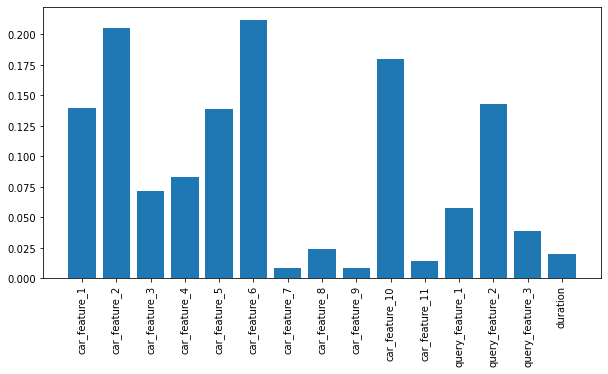

In [24]:
# Plot mic
plt.figure(figsize=(10, 5))
plt.bar(X.columns, mic)
plt.xticks(rotation=90)
plt.show()

### Based on the MI score, i.e. the measure of dependeny between <ins> car_feature_6 (unique values - 0, 1) and target variable <ins> is the highest followed by car_feature_2 (unique values - 0,1 ) and car_feature_10 (unique values: 3,  2, 13, 15, 17, 12). These categorical features are key features behind the purchasing decision of the customer.

## Pricing

#### Check for normality using Shapiro-Wilk test

In [25]:
# shapiro wilk test to check if the price for cars not booked is normally distributed 
from scipy.stats import shapiro
stat, p = shapiro(df[df['target'] == 0]['price'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('The price of cars not booked follows a Gaussian distribution')
else:
    print('The price of cars not booked does not follow a Gaussian distribution')


# shapiro wilk test to check if the price for cars booked is normally distributed 
from scipy.stats import shapiro
stat, p = shapiro(df[df['target'] == 1]['price'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('The price of cars booked follows a Gaussian distribution')
else:
    print('The price of cars booked does not follow a Gaussian distribution')

Statistics=0.574, p=0.000
The price of cars not booked does not follow a Gaussian distribution
Statistics=0.758, p=0.000
The price of cars booked does not follow a Gaussian distribution


C:\Users\viraj\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Check for outliers and remove outliers using IQR. The data points are considered outlier when a data lies outside of 𝜇±2⋅7𝜎.

In [26]:
## remove outliers from the price column for target = 0 using IQR
q1 = df[df['target'] == 0]['price'].quantile(0.25)
q3 = df[df['target'] == 0]['price'].quantile(0.75)
iqr = q3 - q1
df = df[~((df['target'] == 0) & (df['price'] < (q1 - 1.5 * iqr)) | (df['price'] > (q3 + 1.5 * iqr)))]


In [27]:
## remove outliers from the price column for target = 1 using IQR
q1 = df[df['target'] == 1]['price'].quantile(0.25)
q3 = df[df['target'] == 1]['price'].quantile(0.75)
iqr = q3 - q1
df = df[~((df['target'] == 1) & (df['price'] < (q1 - 1.5 * iqr)) | (df['price'] > (q3 + 1.5 * iqr)))]


In [28]:
df.shape

(792802, 25)

Range of price for booked cars 502.28
Range of price for cars not booked 507.56


<AxesSubplot:xlabel='target', ylabel='price'>

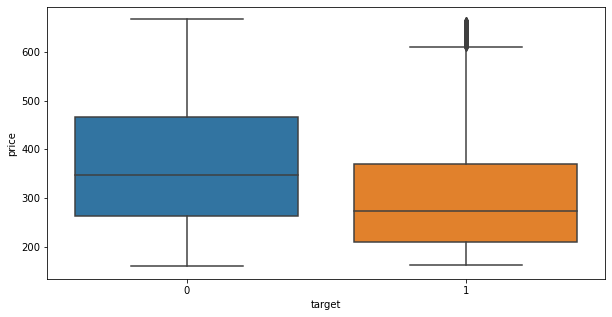

In [29]:
# calculate range of price
print('Range of price for booked cars {}'.format(df[df['target'] == 1]['price'].max() - df[df['target'] == 1]['price'].min()))
print('Range of price for cars not booked {}'.format(df[df['target'] == 0]['price'].max() - df[df['target'] == 0]['price'].min()))


import seaborn as sns
# box plot of price by target
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x='target', y='price', data=df, ax=ax)

#### Distribution of price for booked and not booked samples

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


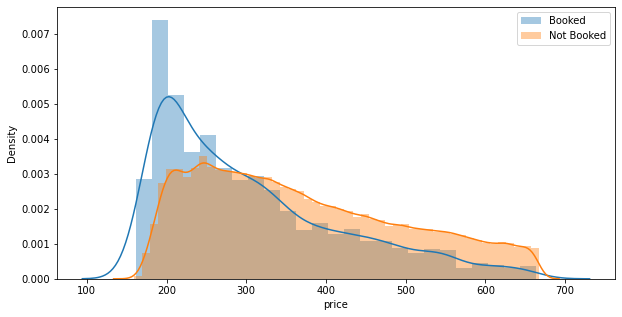

In [30]:
# Distribution of price by target
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(df[df['target'] == 1]['price'], ax=ax, label='Booked')
sns.distplot(df[df['target'] == 0]['price'], ax=ax, label='Not Booked')
plt.legend()


#### Calculate confidence interval for pricing for booked and not booked vehicles with bootstrap since the distribution is not Gaussian.


In [31]:
import numpy as np
def calc_bootstrap(data:pd.Series, func, size:int) -> list:

    """
    __Summary__: This function performs bootstrapping

    __args__:
        data: data to be bootstrapped
        func: function to be applied to the data
        size: number of samples to be drawn

    __return__:
        list of bootstrapped values

    """
    bootstrap = []
    for i in range(size):
        bootstrap.append(func(np.random.choice(data, size=len(data), replace=True)))
    return bootstrap

# calculate bootstrap for price
bootstrap_booked = calc_bootstrap(df[df['target'] == 1]['price'], np.mean, 1000)
bootstrap_not_booked = calc_bootstrap(df[df['target'] == 0]['price'], np.mean, 1000)

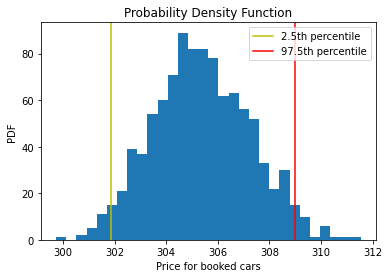

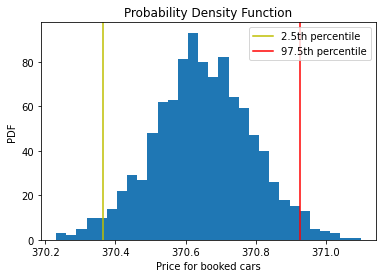

In [32]:
# calculate 95% confidence interval for booked cars
plt.hist(bootstrap_booked,bins=30)

# Showing the related percentiles 
plt.axvline(x=np.percentile(bootstrap_booked,[2.5]), ymin=0, ymax=1,label='2.5th percentile',c='y')
plt.axvline(x=np.percentile(bootstrap_booked,[97.5]), ymin=0, ymax=1,label='97.5th percentile',c='r')

plt.xlabel("Price for booked cars")
plt.ylabel("PDF")
plt.title("Probability Density Function")
plt.legend()
plt.show()


# calculate 95% confidence interval for not booked cars
plt.hist(bootstrap_not_booked,bins=30)

# Showing the related percentiles 
plt.axvline(x=np.percentile(bootstrap_not_booked,[2.5]), ymin=0, ymax=1,label='2.5th percentile',c='y')
plt.axvline(x=np.percentile(bootstrap_not_booked,[97.5]), ymin=0, ymax=1,label='97.5th percentile',c='r')

plt.xlabel("Price for booked cars")
plt.ylabel("PDF")
plt.title("Probability Density Function")
plt.legend()
plt.show()

In [33]:
Conf_interval = np.percentile(bootstrap_booked, [2.5, 97.5])
print('Confidence interval for booked cars is {}'.format(Conf_interval))


Confidence interval for booked cars is [301.88054681 308.98354694]


In [34]:
Conf_interval = np.percentile(bootstrap_not_booked, [2.5, 97.5])
print('Confidence interval for booked cars is {}'.format(Conf_interval))


Confidence interval for booked cars is [370.36536073 370.92669383]


### Since the 95% confidence interval for booked and not booked vehicle prices do not overlap, we can conclude that there is a statistically significant difference in the price of booked and not booked vehicles.

### Further testing to test significance. 
Perform Independent Two Sample t-Test pricing to determine if there is a significant difference in the mean of the booked cars and the mean of the unbooked cars

In [35]:
# Perform box cox transformation on price to make it Gaussian.

from scipy.stats import boxcox
# select data where target = 1
df_target_1 = df[df['target'] == 1]
# select data where target = 0
df_target_0 = df[df['target'] == 0]
# transform data
df_target_0['price_transformed'] = boxcox(df_target_0['price'], 0)
df_target_1['price_transformed'] = boxcox(df_target_1['price'], 0)

<ipython-input-35-336a292f8e8f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target_0['price_transformed'] = boxcox(df_target_0['price'], 0)
<ipython-input-35-336a292f8e8f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target_1['price_transformed'] = boxcox(df_target_1['price'], 0)


In [36]:
# Peform Independent t-test to check if the price of cars booked is significantly different from the price of cars not booked

from scipy.stats import ttest_ind
stat, p = ttest_ind(df_target_1['price_transformed'], df_target_0['price_transformed'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('The price of cars booked is not significantly different from the price of cars not booked')
else:
    print('The price of cars booked is significantly different from the price of cars not booked')


Statistics=-34.879, p=0.000
The price of cars booked is significantly different from the price of cars not booked


### 95% CI for the population mean price of booked cars is [301.89215638, 309.11135853] and 95% CI for the population mean price of unbooked cars is [370.36112329, 370.94803343]. Since the means of prices for booked and cars not booked are significantly different, we can conclude that price has a large impact on whether a car is booked or not.

## •	What are the key features behind purchasing a vehicle?

### From the above analysis we can say that car feature 6, car feature 2 and car feature 10 and pricing are the key features behind purchasing a vehicle.


# •	How large an influence is the price on customer’s purchasing behaviour?

### From the above analysis we can say that price has a large impact on whether a car is booked or not.
